<h1 style="color: white; background-color: #550A35; padding: 10px;">Import Libraries and Load Dataset</h1>


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/laptop-prices/Laptop-Price.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Unnamed: 16       0 non-null      float64


In [2]:
df.drop(columns=['Unnamed: 16'], inplace=True)
df['Cpu Rate'] = df['Cpu Rate'].str.replace('GHz', '').astype(float)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   int64  
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   float64
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Price_euros       1146 non-null   float64


<h1 style="color: white; background-color: #550A35; padding: 10px;">Exploratory Data Analysis (EDA)</h1>


In [3]:
print(df.describe())

            Inches          Ram    Cpu Rate          SSD          HDD  \
count  1146.000000  1146.000000  1146.00000  1146.000000  1146.000000   
mean     15.151396     8.876091     2.40534   187.710297    46.347295   
std       1.319303     5.078975     0.41420   160.313927   144.192738   
min      11.300000     4.000000     0.90000     0.000000     0.000000   
25%      14.000000     6.000000     2.30000     0.000000     0.000000   
50%      15.600000     8.000000     2.50000   256.000000     0.000000   
75%      15.600000     8.000000     2.70000   256.000000     1.000000   
max      18.400000    64.000000     3.60000   512.000000   500.000000   

       Flash Storage       Hybrid  Price_euros  
count    1146.000000  1146.000000  1146.000000  
mean        1.898778     0.539267  1204.876972  
std        26.275202    15.035060   676.630847  
min         0.000000     0.000000   265.000000  
25%         0.000000     0.000000   699.750000  
50%         0.000000     0.000000  1049.750000  

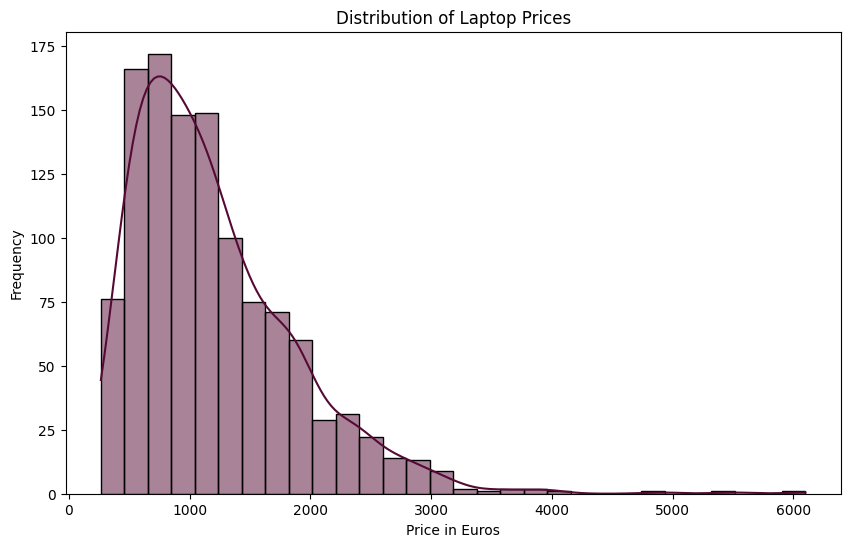

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=30, kde=True, color='#550A35') 
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price in Euros')
plt.ylabel('Frequency')
plt.show()

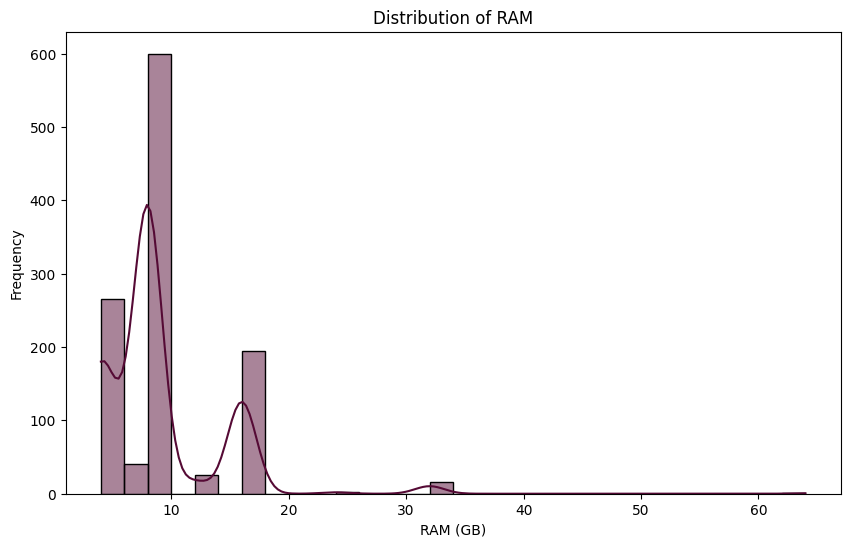

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ram'], bins=30, kde=True,color='#550A35')
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

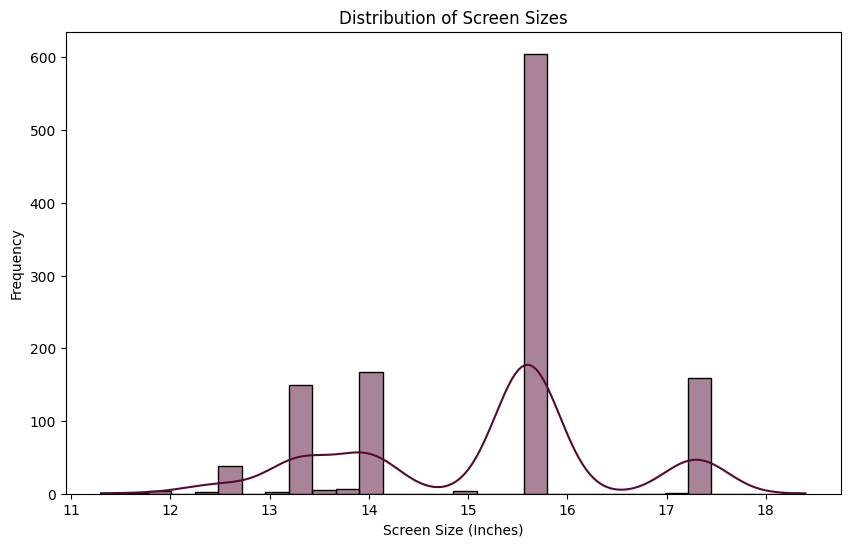

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Inches'], bins=30, kde=True,color='#550A35')
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.show()


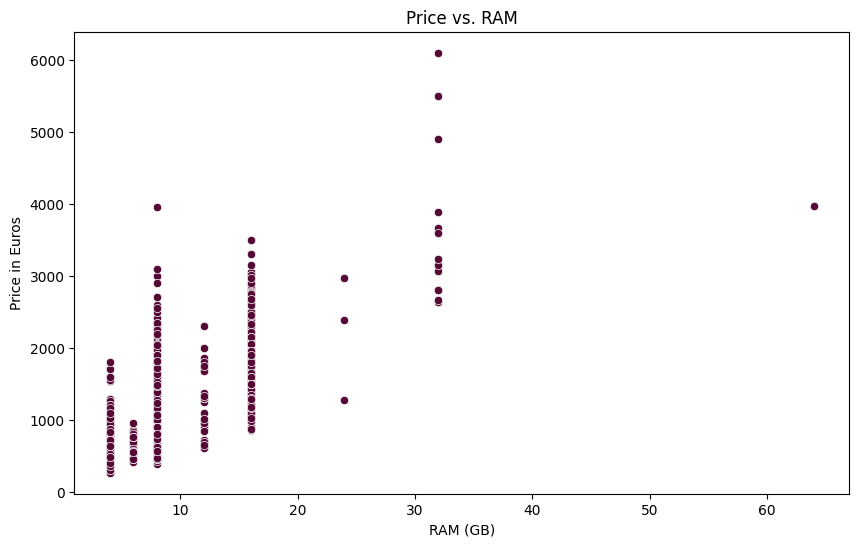

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=df,color='#550A35')
plt.title('Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price in Euros')
plt.show()

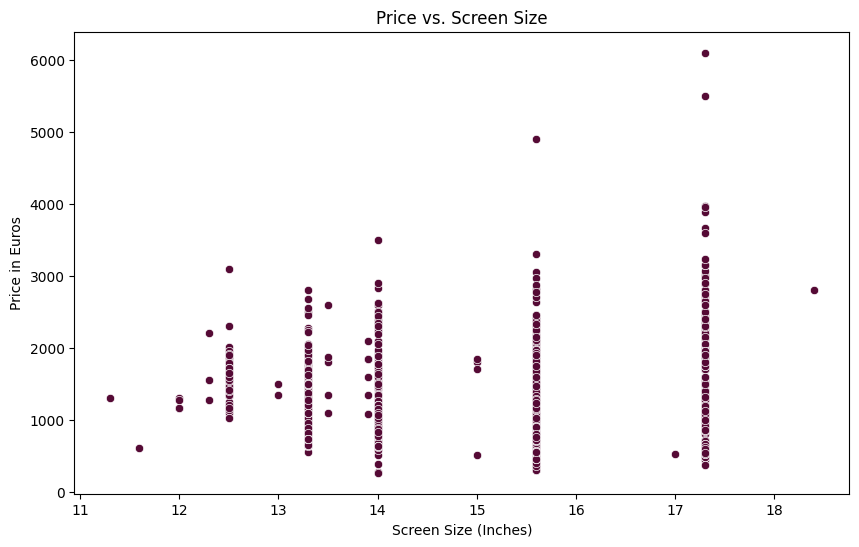

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df,color='#550A35')
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price in Euros')
plt.show()

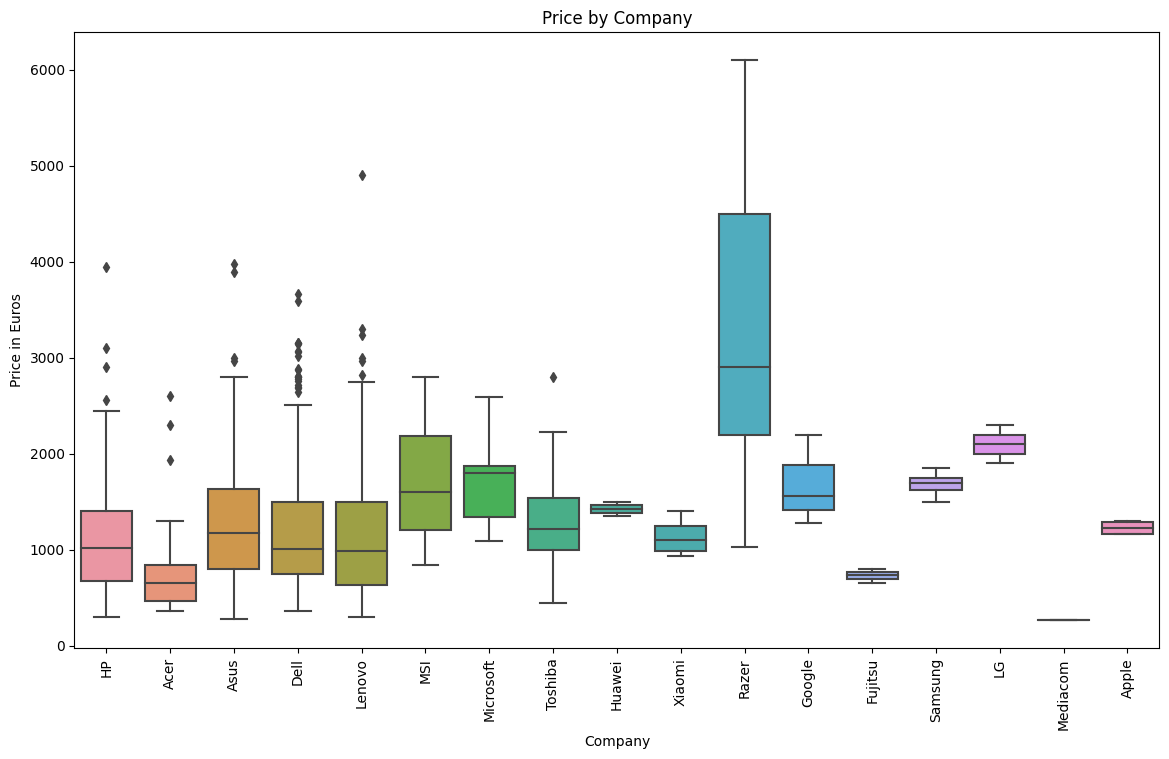

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.title('Price by Company')
plt.xlabel('Company')
plt.ylabel('Price in Euros')
plt.xticks(rotation=90)
plt.show()


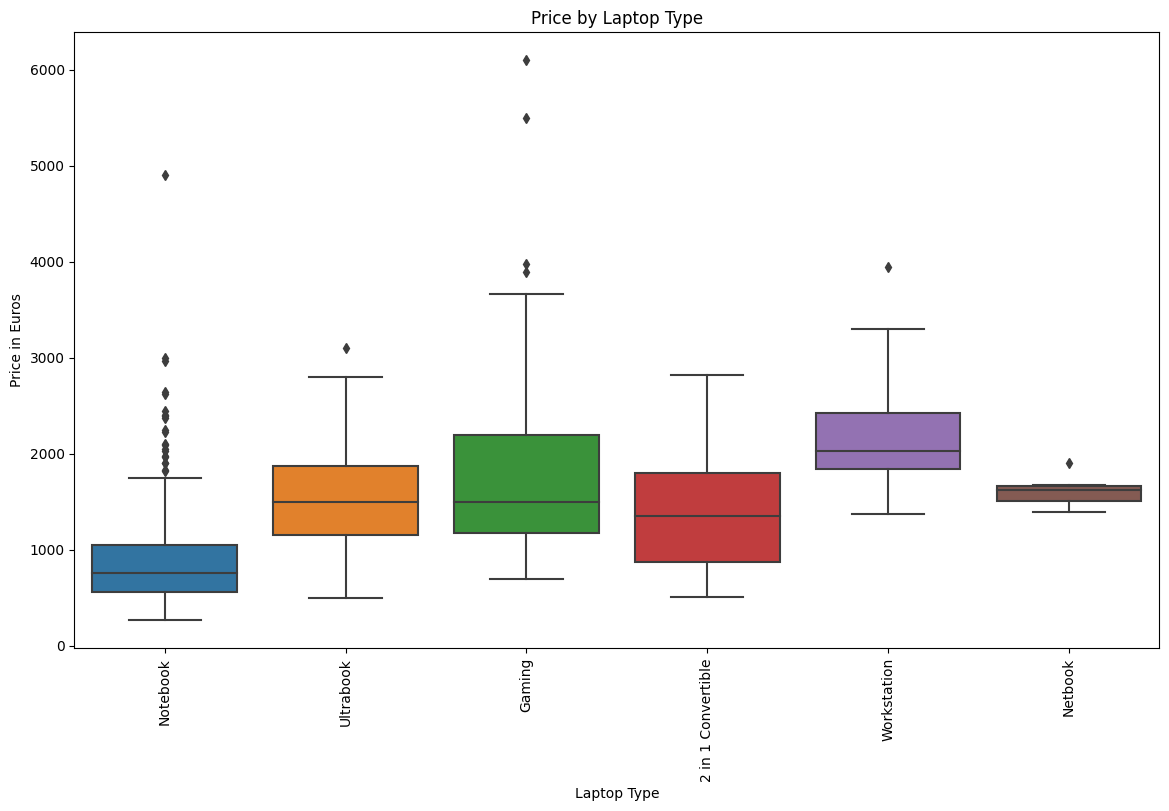

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='TypeName', y='Price_euros', data=df)
plt.title('Price by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Price in Euros')
plt.xticks(rotation=90)
plt.show()

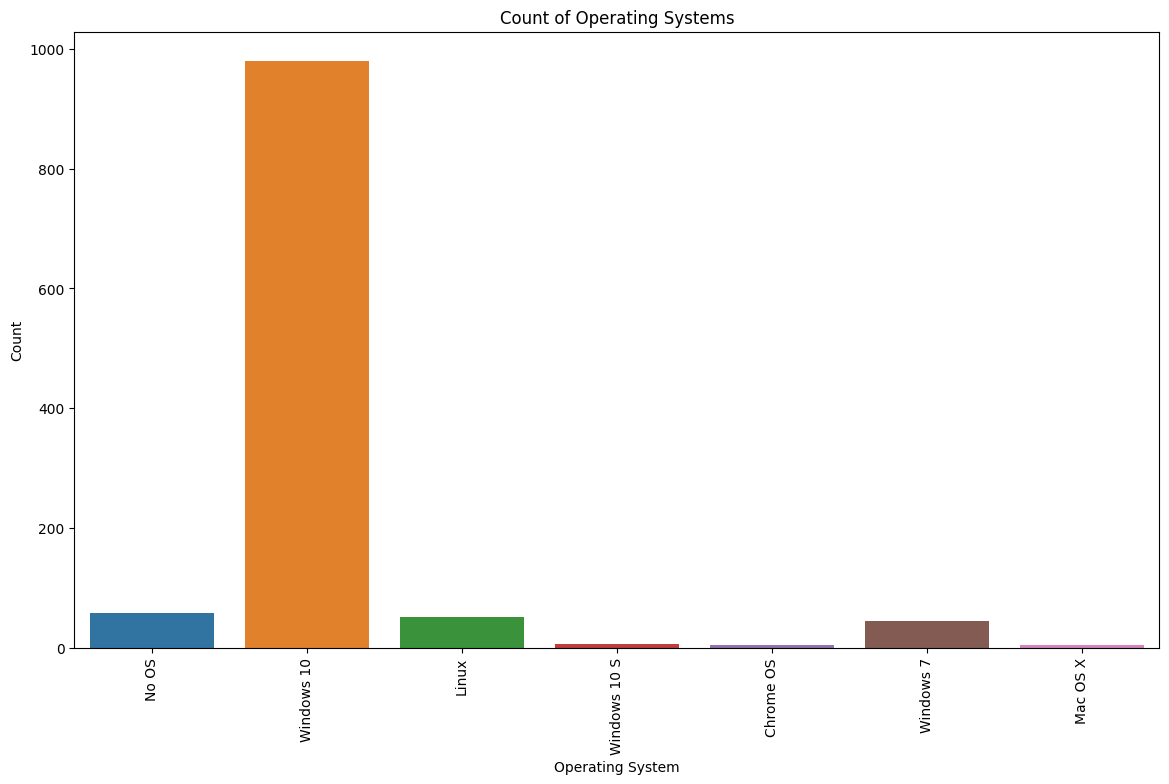

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(x='OpSys', data=df)
plt.title('Count of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

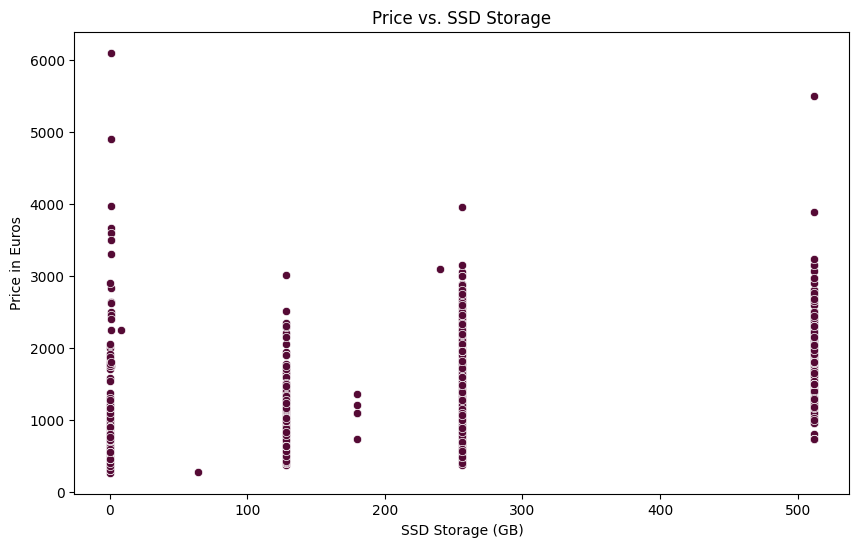

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSD', y='Price_euros', data=df,color='#550A35')
plt.title('Price vs. SSD Storage')
plt.xlabel('SSD Storage (GB)')
plt.ylabel('Price in Euros')
plt.show()

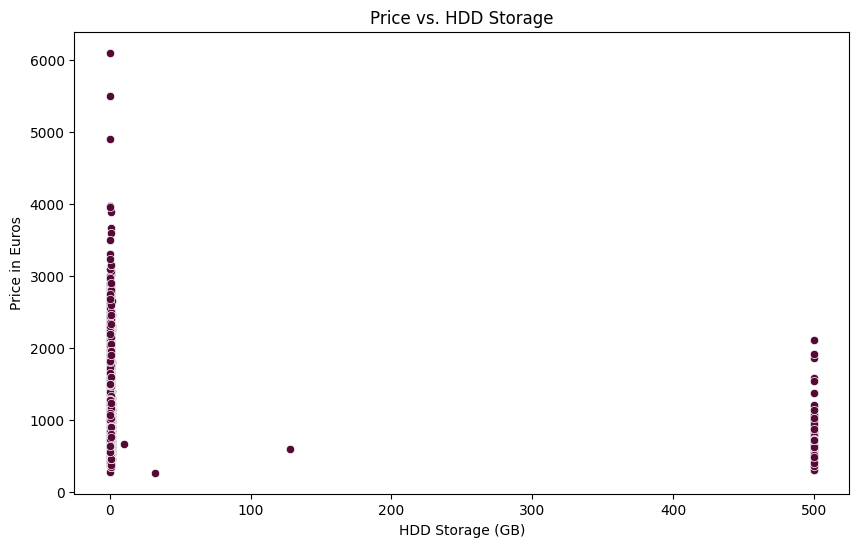

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDD', y='Price_euros', data=df,color='#550A35')
plt.title('Price vs. HDD Storage')
plt.xlabel('HDD Storage (GB)')
plt.ylabel('Price in Euros')
plt.show()

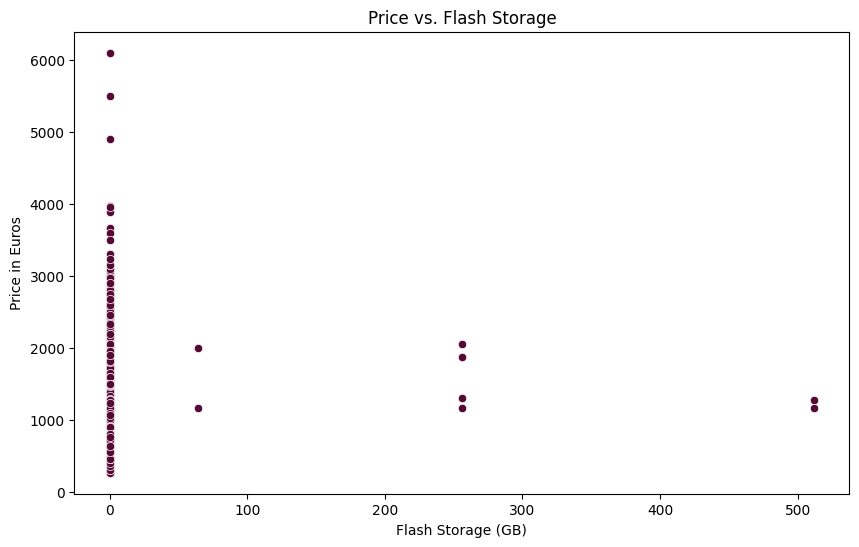

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flash Storage', y='Price_euros', data=df,color='#550A35')
plt.title('Price vs. Flash Storage')
plt.xlabel('Flash Storage (GB)')
plt.ylabel('Price in Euros')
plt.show()

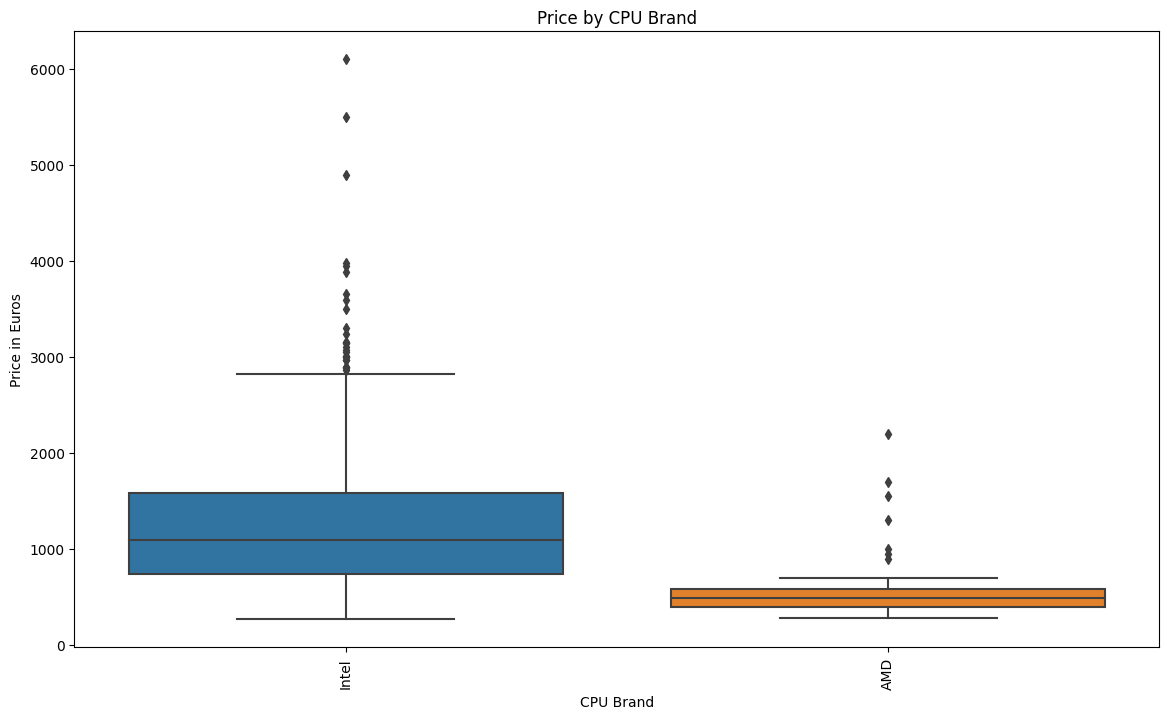

In [15]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Cpu Brand', y='Price_euros', data=df)
plt.title('Price by CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price in Euros')
plt.xticks(rotation=90)
plt.show()

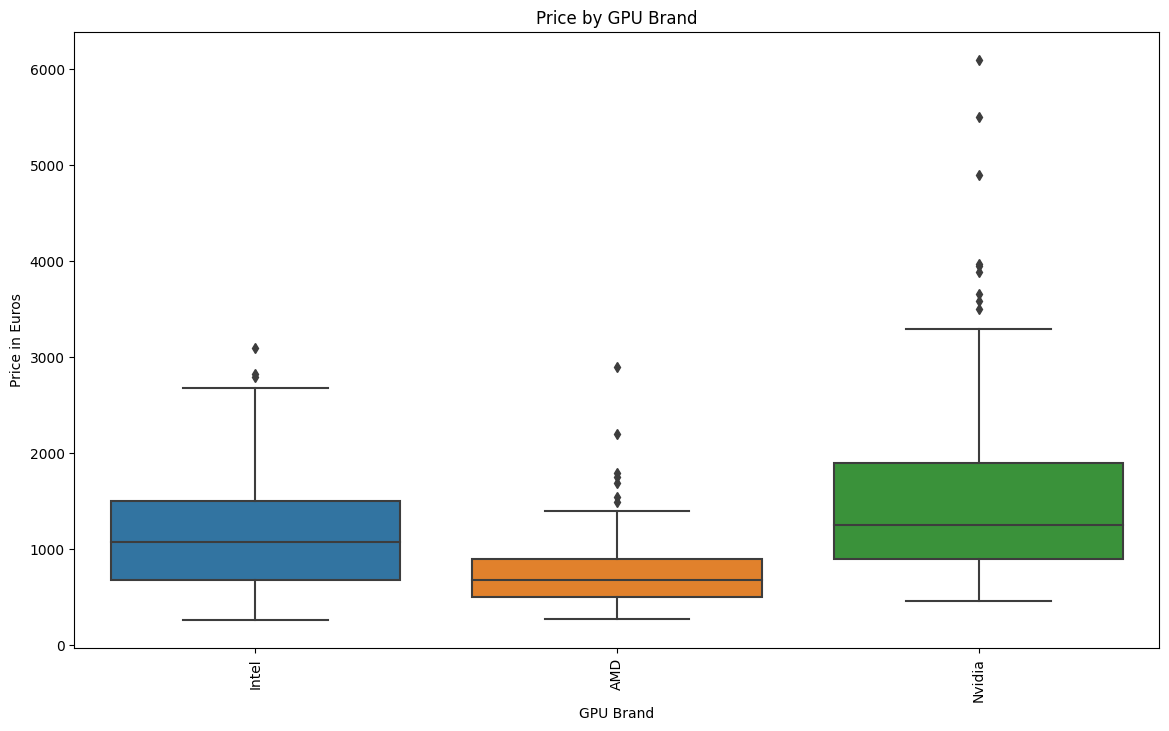

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Gpu Brand', y='Price_euros', data=df)
plt.title('Price by GPU Brand')
plt.xlabel('GPU Brand')
plt.ylabel('Price in Euros')
plt.xticks(rotation=90)
plt.show()

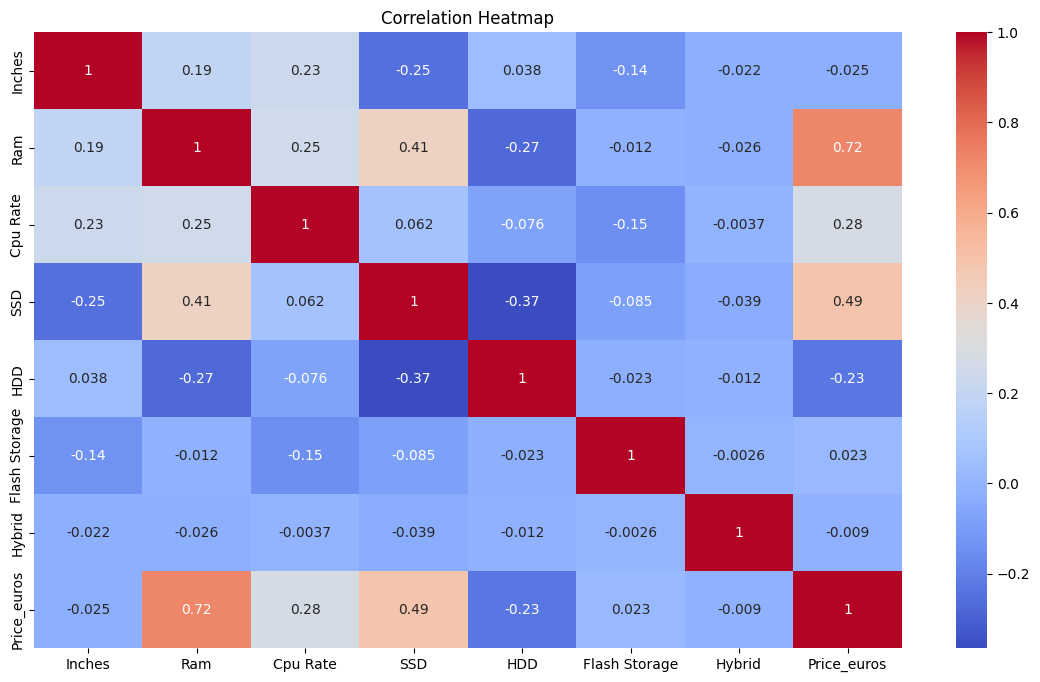

In [17]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


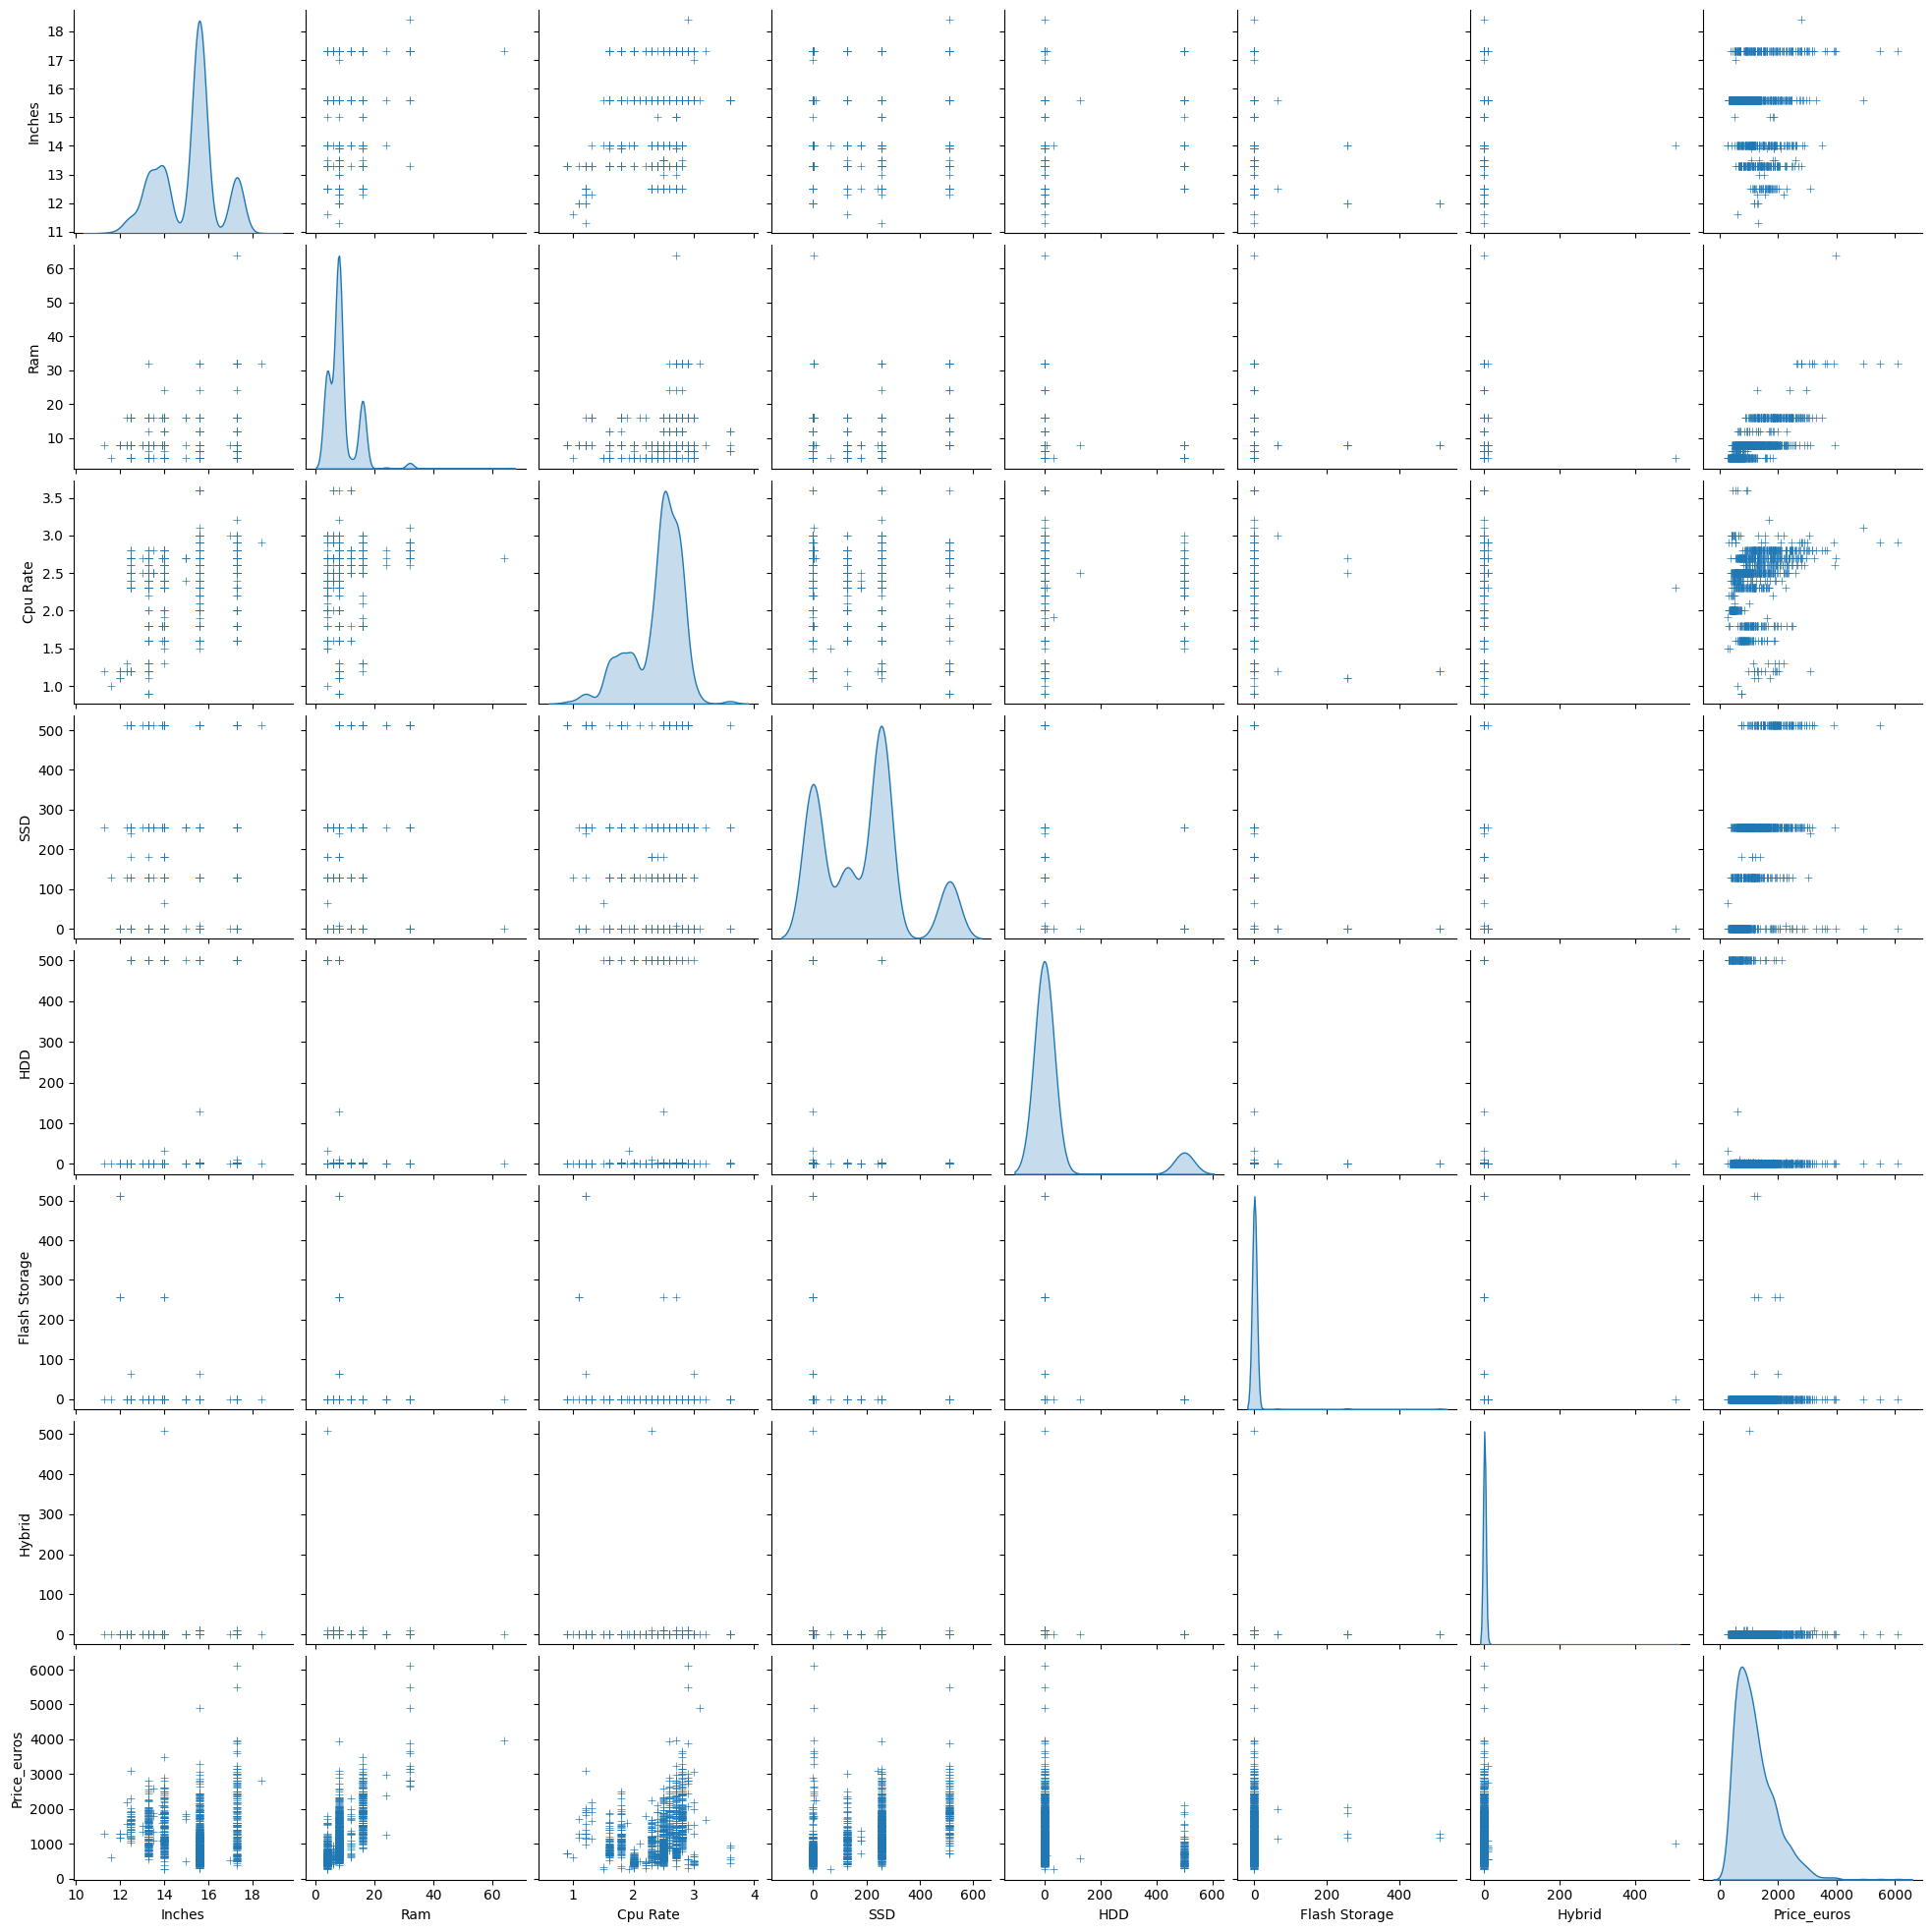

In [18]:
sns.pairplot(df, diag_kind='kde', markers='+', palette='coolwarm')
plt.show()

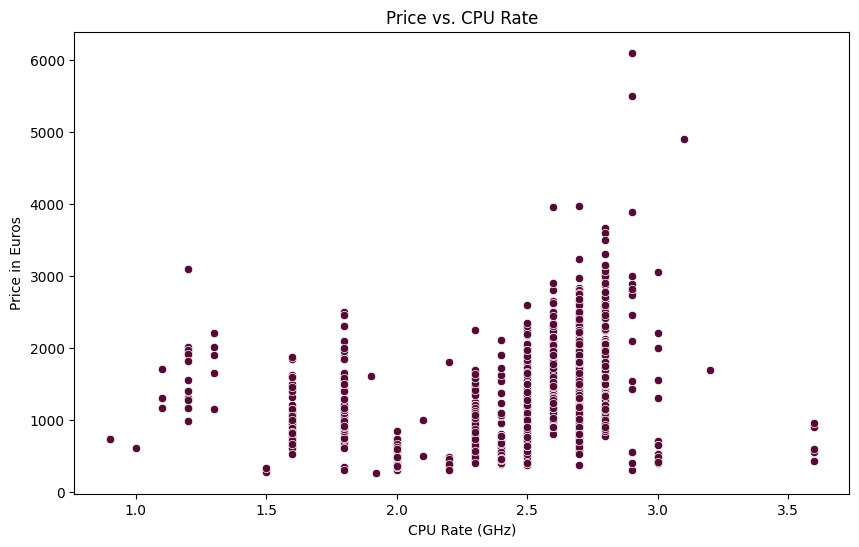

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cpu Rate', y='Price_euros', data=df,color='#550A35')
plt.title('Price vs. CPU Rate')
plt.xlabel('CPU Rate (GHz)')
plt.ylabel('Price in Euros')
plt.show()


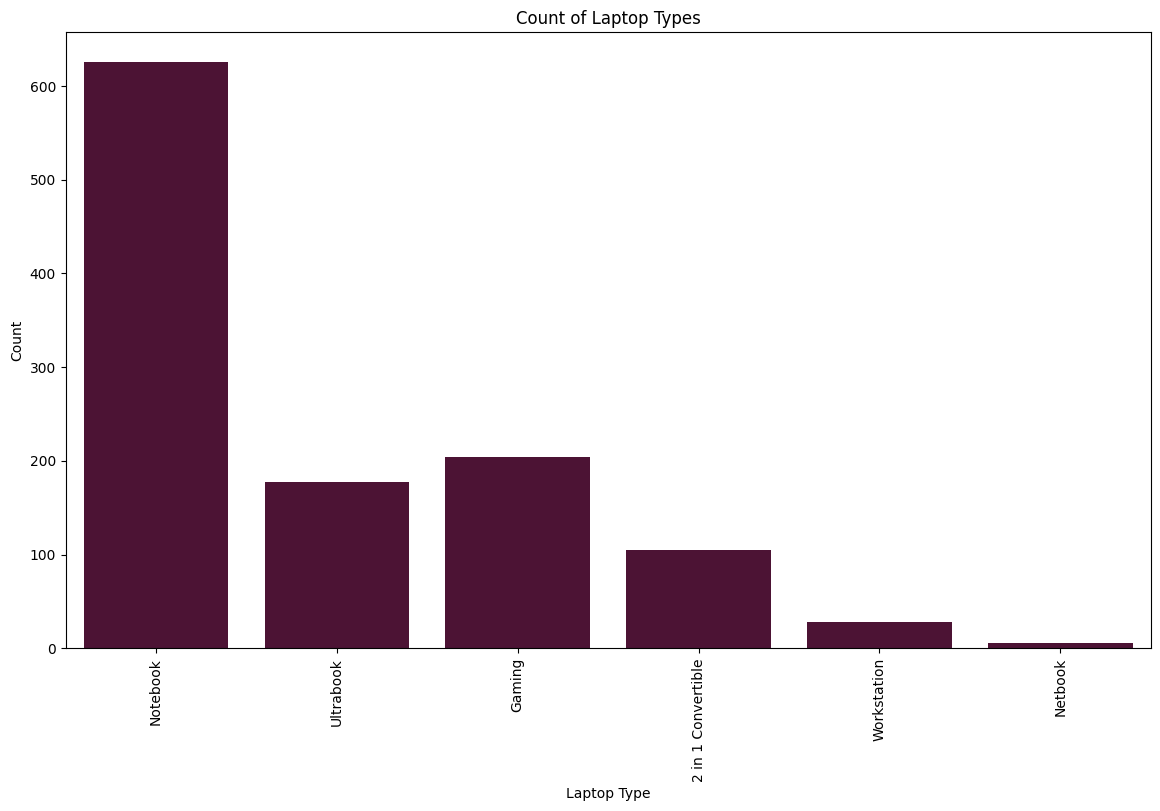

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x='TypeName', data=df,color='#550A35')
plt.title('Count of Laptop Types')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

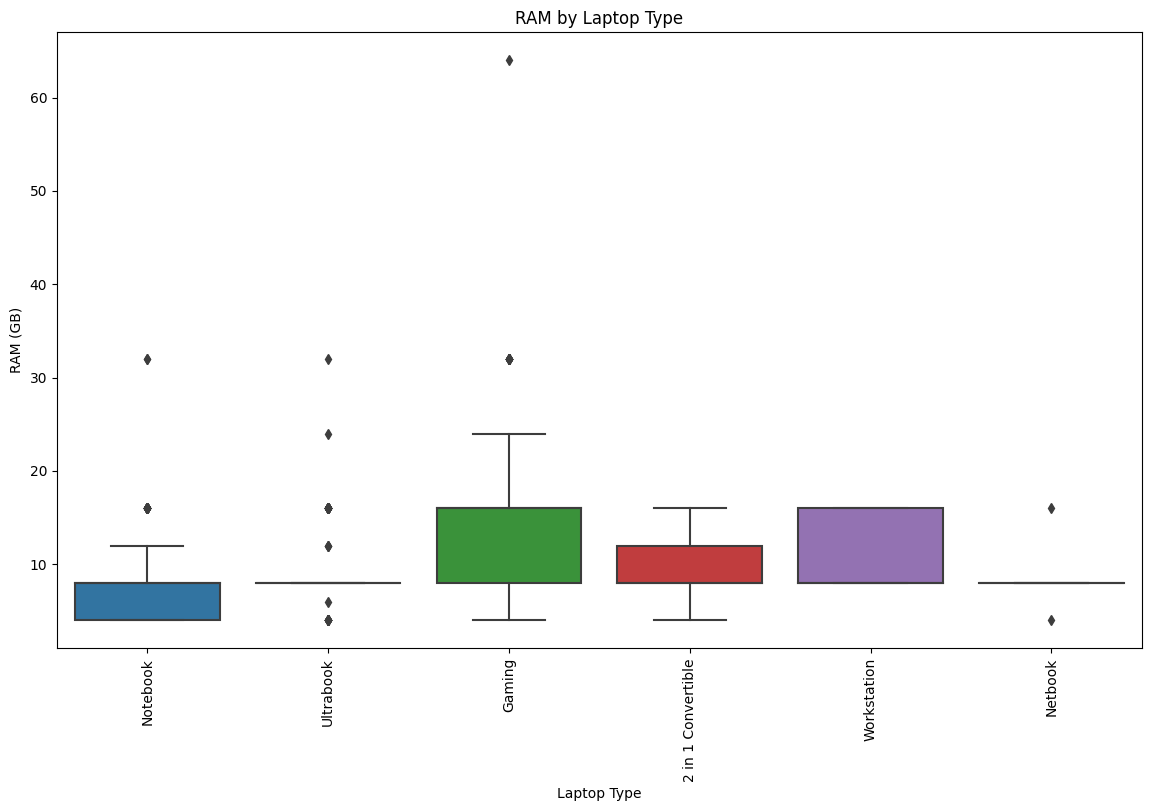

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='TypeName', y='Ram', data=df)
plt.title('RAM by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=90)
plt.show()

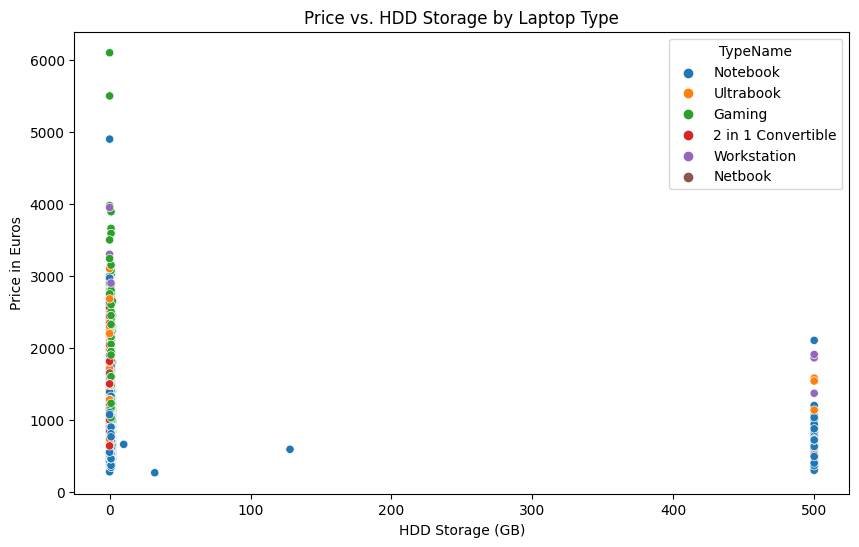

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDD', y='Price_euros', hue='TypeName', data=df)
plt.title('Price vs. HDD Storage by Laptop Type')
plt.xlabel('HDD Storage (GB)')
plt.ylabel('Price in Euros')
plt.show()


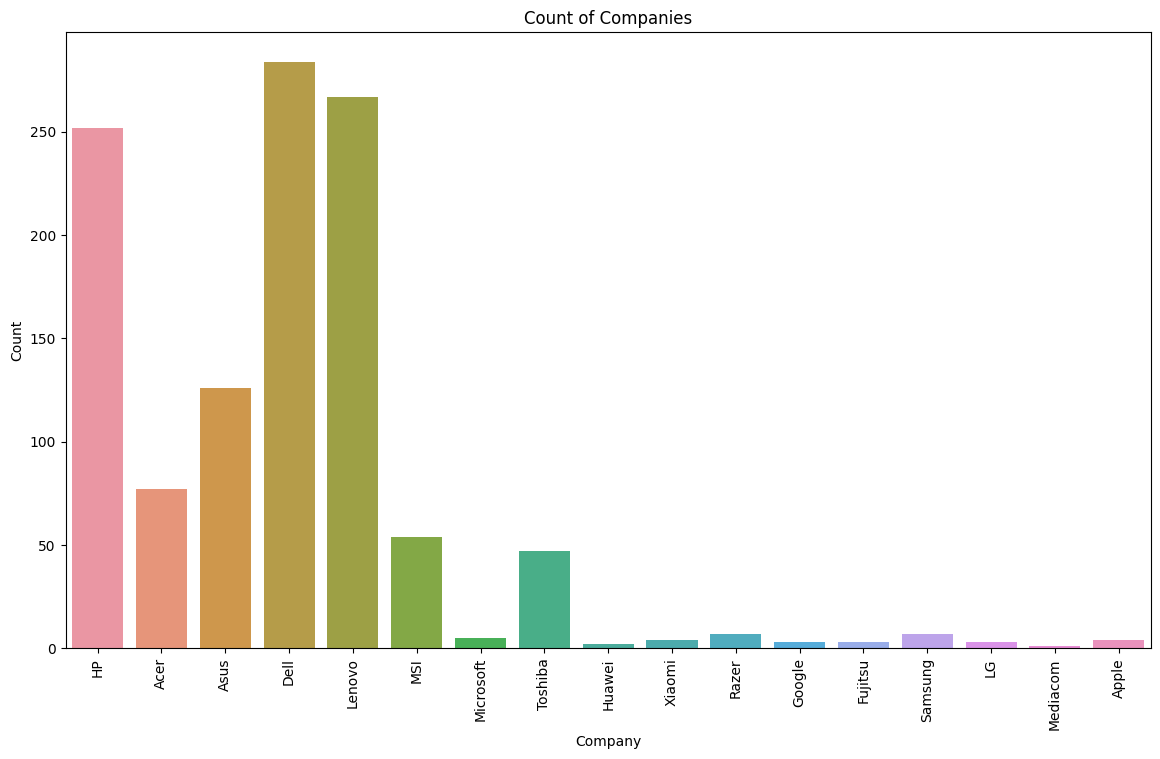

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Company', data=df)
plt.title('Count of Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<h1 style="color: white; background-color: #550A35; padding: 10px;">Models</h1>



Linear Regression - MSE: 91193.08560873957, R^2: 0.8114241688005583
Decision Tree - MSE: 112123.37028967388, R^2: 0.7681429725936184
Random Forest - MSE: 61603.818071792746, R^2: 0.8726110524674013
Gradient Boosting - MSE: 72784.5727339736, R^2: 0.8494906580889955
XGBoost - MSE: 63645.46507642758, R^2: 0.8683891832506199


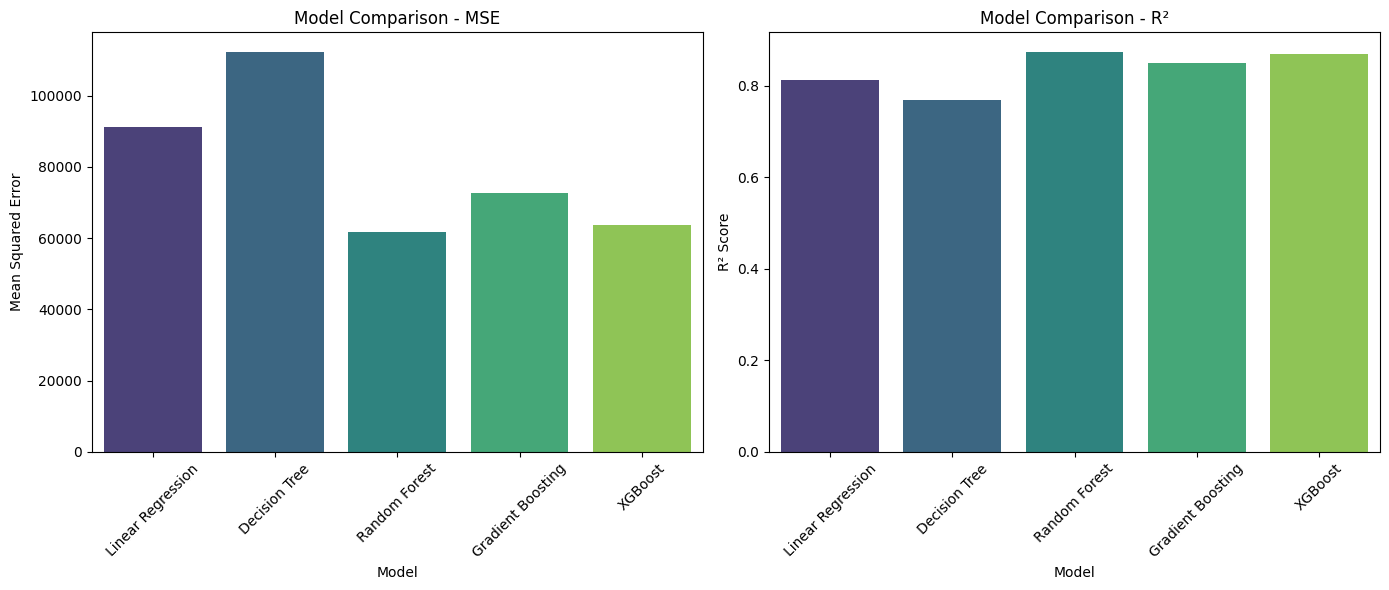

In [24]:
X = df.drop(columns=['Price_euros'])
y = df['Price_euros']

categorical_cols = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu Brand', 'Cpu Model', 'Gpu Brand', 'Gpu Model']
numerical_cols = ['Inches', 'Ram', 'Cpu Rate', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}


model_names = []
mse_values = []
r2_values = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f'{name} - MSE: {mse}, R^2: {r2}')


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


sns.barplot(x=model_names, y=mse_values, ax=ax[0], palette="viridis")
ax[0].set_title('Model Comparison - MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xlabel('Model')
for item in ax[0].get_xticklabels():
    item.set_rotation(45)

sns.barplot(x=model_names, y=r2_values, ax=ax[1], palette="viridis")
ax[1].set_title('Model Comparison - R²')
ax[1].set_ylabel('R² Score')
ax[1].set_xlabel('Model')
for item in ax[1].get_xticklabels():
    item.set_rotation(45)
    
    
plt.tight_layout()
plt.show()
